In [1]:
import altair as alt
import pandas as pd

data = pd.read_excel('fulldata_cleantext.xlsx')

In [2]:
data.head(2)

,Unnamed: 0,subreddit,subreddit_subscribers,title,id,author,created_utc,num_comments,score,selftext,url,upvote_ratio,comments
0,2,askSingapore,44675.0,anyone know get tested adult auditory processi...,ng6k8b,summerfellxx,2021-05-19,6.0,8.0,know mostly test child really need know whats ...,https://www.reddit.com/r/askSingapore/comments...,0.84,is recent going since childhood nnif recent mi...
1,4,NationalServiceSG,11091.0,help adjustment disorder,mfnwal,ElijahThor00,2021-03-29,6.0,5.0,people say half war report mental illness long...,https://www.reddit.com/r/NationalServiceSG/com...,0.86,pretty long unfortunately im currently going c...


In [3]:
data.shape

(12856, 13)

In [4]:
date_count = data.groupby('created_utc')['created_utc'].count().to_frame()
date_count = date_count.rename(columns={'created_utc': 'count'})
date_count = date_count.reset_index()

In [7]:
alt.renderers.enable('default') 

selection = alt.selection_multi(fields=['count'], bind='legend')

trend = alt.Chart(date_count, title="Reddit Overall Trend").mark_line().encode(
    x=alt.X(
        "created_utc",
        axis=alt.Axis(title="created_utc")
    ),
    y='count',
).properties(
    width=800,
    height=400
).configure_axisX(
    labelAngle=-45,
).interactive().add_selection(
    selection
)


trend

alt.Chart(...)

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 

def sentiment_scores(sentence):
    sentence['positive'] = 0
    sentence['negative'] = 0
    sentence['neutral'] = 0
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(str(sentence['title'])+str(sentence['selftext']))
    sentence['positive_percentage'] = sentiment_dict['pos']*100
    sentence['negative_percentage'] = sentiment_dict['neg']*100
    sentence['neutral_percentage'] = sentiment_dict['neu']*100
     
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        sentence['positive'] = 1
 
    elif sentiment_dict['compound'] <= - 0.05 :
        sentence['negative'] = 1
 
    else :
        sentence['neutral'] = 1
        
    return sentence

In [9]:
sentiment_analysis = data.apply(sentiment_scores, axis=1) 

In [10]:
sentiment_analysis_group = sentiment_analysis.groupby('created_utc')['positive', 'negative', 'neutral'].sum().reset_index()

<ipython-input-10-cb33425b550f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sentiment_analysis_group = sentiment_analysis.groupby('created_utc')['positive', 'negative', 'neutral'].sum().reset_index()


In [13]:
sentiment_analysis_df = sentiment_analysis_group[['positive', 'negative', 'neutral', 'created_utc']].melt(id_vars='created_utc')

In [14]:
sentiment_analysis_df.head(2)

,created_utc,variable,value
0,2016-08-16,positive,0
1,2016-08-19,positive,1


In [52]:
selection = alt.selection_multi(fields=['color'], bind='legend')

sentiment_trend = alt.Chart(sentiment_analysis_df, title='Sentiment Analysis Trend').mark_line().encode(
        x=alt.X(
            "created_utc",
            axis=alt.Axis(title="created_utc")
        ),
        y='value',
        color='variable:N',
    ).properties(
        width=800,
        height=400
    ).configure_axisX(
        labelAngle=-45,
    ).interactive().add_selection(
        selection
    )

sentiment_trend

alt.Chart(...)

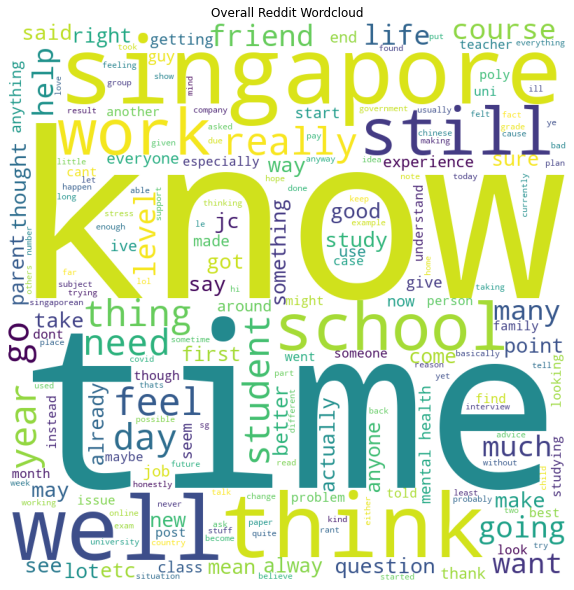

In [73]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in data.iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Overall Reddit Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Positive Sentiment

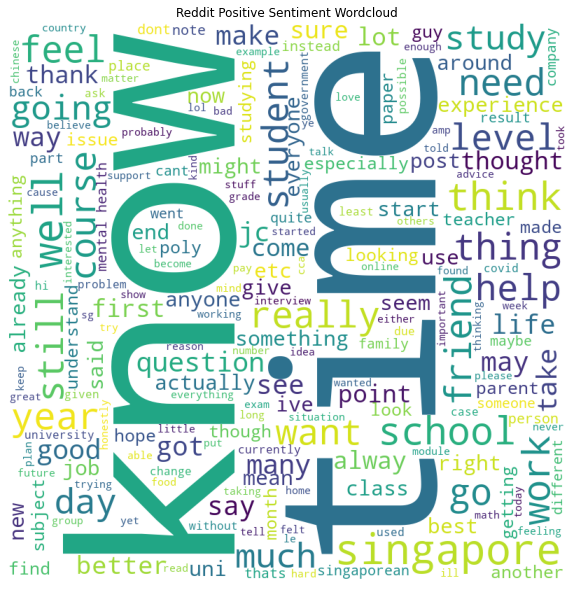

In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['positive']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Positive Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Negative Sentiment

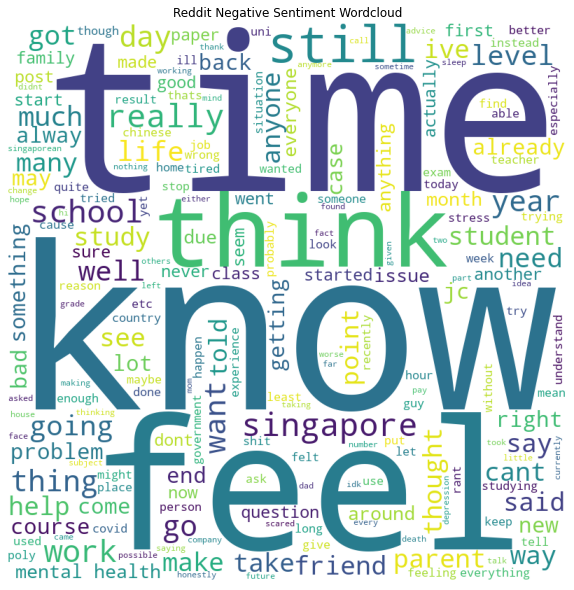

In [75]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['negative']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Negative Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Neutral Sentiment

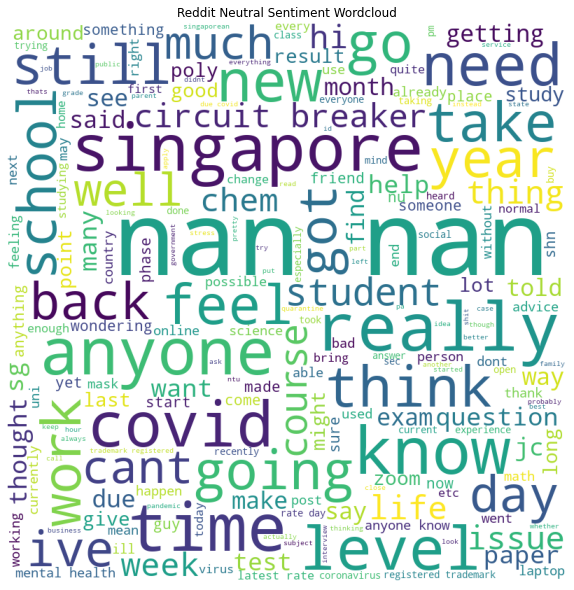

In [76]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['neutral']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Neutral Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()